# **Clinical Data Science and Machine Learning with Python**
# Course Code forked from Teresa Krieger at BIH/Charite
## **Day 1**

**Instructor**: Teresa Krieger, BIH/Charité (teresa.krieger@charite.de)


**Content**:

1.   References
2.   Basic usage
3.   Importing libraries and data
4.   Data exploration
5.   Performing calculations on data
6.   Visualising data
7.   Dimensional reduction and clustering
8.   Identifying cell types

---
## **1. References**

In this course, we will use Python 3.6 (default in Colab as of February 2021).
The following documentation and links might be useful to you:

- Python 3:
  - https://docs.python.org/3/
- `numpy`:
  - https://numpy.org/doc/stable/user/absolute_beginners.html
- `pandas`:
  - https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html
- `matplotlib`:
  - https://matplotlib.org/stable/
- Source of the PBMC dataset:
  - https://support.10xgenomics.com/single-cell-gene-expression/datasets/1.1.0/pbmc3k



---
## **2. Basic usage**

**Jupyter notebook**:

This web-based interface is a **Jupyter notebook**, a web application that allows you to create and share documents which contain executable code, equations, visualizations and explanatory text.

It allows you to define **cells** of different formats:

- Text cells (like this cell)
- Code cells

You can *run* (execute) each cell seperately by pressing <kbd>Shift</kbd>+<kbd>Enter</kbd> or <kbd>Ctrl</kbd>+<kbd>Enter</kbd>. All names you define (variables, functions...) are available for *both* preceding _and_ following cells once executed.

Some code cells additionally produce an output (text, images, etc.), which will appear underneath the cell.


**Flow control**:

Liker programming languages python allows you to control the flow of variables through your code through conditional statements: `if`, `else`, `for`, `while`.

For example, we could write a script that checks the oxygen saturation of a patient and raises an alert if it goes below a certain threshold:
```python
if oxygen_saturation < 90:
    print("We've got a problem!")
else:
    print("Oxygen levels are looking good.")
```

**Functions**:

Functions are essentially reusable snippets of code that accept variables as arguments. They can thus perform the same operations on many different inputs. Functions in Python could accept one or several variables, some of which might be optional.

To learn more about a particular function, you can access its documentation using `help(function_name)`.

```python
# Define a function
def square(number):
    output = number ** 2
    return output

# Use the function
result = square(2)
```

**Methods and attributes**:

Besides functions, Python also knows methods (which are functions attached to variables) and attributes (which are variables attached to variables). These can be accessed using a `.` after the variable name.

For example, a variable that contains `5.7` has a method `is_integer()` and an attribute `real`:


In [2]:
test_variable = 5.7

In [3]:
test_variable.is_integer()

False

In [4]:
test_variable.real

5.7

---
#### **_Your turn_: Exercises**

**Exercise 1**: Try to execute the following cells and make sure the output appears. Also try writing some code yourself!

In [5]:
print("This statement will appear as output.")
# This is a comment. Comments are ignored in the outputs of a cell.
# print('This statement will NOT appear as output.')

This statement will appear as output.


In [6]:
this_is_a_boolean = False   # A boolean variable is either False or True
print(this_is_a_boolean)

False


In [7]:
my_string = "This is a string"
print(my_string)

This is a string


In [8]:
# Try your own code below:

**Exercise 2**: When executing the following code, will there be an error? Why (not)?


In [9]:
x = 5
y = "5"

# y is a string
# fix y
y = 5

print(x + y)

10


**Exercise 3**: What is the expected output of the following code?
```python
x = ""
for i in "Welcome_to_Python!":
    if i == "_":
        x += " "
    else:
        x += i
print(x)
```

**Exercise 4**: Call the documentation for the function `len()`.

In [10]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



---
## **3. Importing libraries and data**

First, we need to install the libraries `scanpy` and `leidenalg` used for RNA sequencing analysis.

In [11]:
!pip3 install -q scanpy[louvain]
!pip3 install leidenalg
!pip3 install -U matplotlib

zsh:1: no matches found: scanpy[louvain]


Restart the runtime after installing new libraries by clicking on `Runtime > Restart runtime` in the menu bar.

Now we can import the libraries `numpy`, `pandas` and `scanpy` (abbreviated as `np`, `pd` and `sc`).

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

We also need to download our data, which consists of single-cell RNA sequencing data from PBMCs from a healthy donor. It is freely available from 10x Genomics and has been provided for you at the link below. In this code, we use the `!` to execute commands not within this notebook but in the shell (meaning on your computer or, in this case, your colab environment). We also use `wget` to download a file from the internet.


In [3]:
!wget -O pbmc.csv https://www.dropbox.com/s/zwiyb1odccjk0cy/pbmc_data.csv?dl=0

zsh:1: no matches found: https://www.dropbox.com/s/zwiyb1odccjk0cy/pbmc_data.csv?dl=0


We will now use the `read_csv()` function ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)) to load the csv file content as a `DataFrame` into the variable `pbmc`.

In [5]:
pbmc = pd.read_csv('pbmc_data.csv', sep=',', index_col=0)

---
### **4. Data exploration**

What does the data in our count matrix look like?

#### `DataFrame` dimensionality

The attribute `shape` contains the number of rows and columns of the table in the form of `(n_rows, n_columns)`.

In [6]:
pbmc.shape

(2000, 2638)

#### `DataFrame` head/tail

The `head()` and and `tail()` functions can be used to take a look at only the first or last few rows of the table ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)).

You can pass a number to these functions to specify how many rows you want to see.

In [7]:
pbmc.head()  # Shows the first 5 rows (by default)

,AAACATACAACCAC,AAACATTGAGCTAC,AAACATTGATCAGC,AAACCGTGCTTCCG,AAACCGTGTATGCG,AAACGCACTGGTAC,AAACGCTGACCAGT,AAACGCTGGTTCTT,AAACGCTGTAGCCA,AAACGCTGTTTCTG,...,TTTCAGTGTCACGA,TTTCAGTGTCTATC,TTTCAGTGTGCAGT,TTTCCAGAGGTGAG,TTTCGAACACCTGA,TTTCGAACTCTCAT,TTTCTACTGAGGCA,TTTCTACTTCCTCG,TTTGCATGAGAGGC,TTTGCATGCCTCAC
PPBP,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LYZ,1,3,2,24,0,1,1,1,0,3,...,0,22,0,0,0,64,0,0,0,1
S100A9,0,0,0,12,0,0,0,0,0,0,...,0,8,0,0,0,96,0,1,0,1
IGLL5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
GNLY,0,0,1,0,3,0,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
pbmc.tail(2)  # Shows the last 2 rows

,AAACATACAACCAC,AAACATTGAGCTAC,AAACATTGATCAGC,AAACCGTGCTTCCG,AAACCGTGTATGCG,AAACGCACTGGTAC,AAACGCTGACCAGT,AAACGCTGGTTCTT,AAACGCTGTAGCCA,AAACGCTGTTTCTG,...,TTTCAGTGTCACGA,TTTCAGTGTCTATC,TTTCAGTGTGCAGT,TTTCCAGAGGTGAG,TTTCGAACACCTGA,TTTCGAACTCTCAT,TTTCTACTGAGGCA,TTTCTACTTCCTCG,TTTGCATGAGAGGC,TTTGCATGCCTCAC
WBP5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HEMGN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### `DataFrame` select entries

To select individual **columns**, we can use the following syntax:

`data_frame[list_of_columns]`

For example, to select the cells with labels 'AAACATTGATCAGC' and 'AAACCGTGTATGCG', the list of column names of interest could look like this: `list_of_columns = ['AAACATTGATCAGC', 'AAACCGTGTATGCG']`

And putting this together:

In [9]:
list_of_columns = ['AAACATTGATCAGC', 'AAACCGTGTATGCG']
pbmc[list_of_columns].head()   # Note the use of .head() to show only the first 5 rows

,AAACATTGATCAGC,AAACCGTGTATGCG
PPBP,0,0
LYZ,2,0
S100A9,0,0
IGLL5,0,0
GNLY,1,3


To select individual rows, we can use 'loc' as follows:

`data_frame.loc[list_of_rows, list_of_columns]`

Note that, to select all rows or columns, we just use `:` instead of giving a list.

So to look at the expression of the gene lysozyme in row 'LYZ' across all columns:

In [10]:
pbmc.loc['LYZ', :]

AAACATACAACCAC     1
AAACATTGAGCTAC     3
AAACATTGATCAGC     2
AAACCGTGCTTCCG    24
AAACCGTGTATGCG     0
                  ..
TTTCGAACTCTCAT    64
TTTCTACTGAGGCA     0
TTTCTACTTCCTCG     0
TTTGCATGAGAGGC     0
TTTGCATGCCTCAC     1
Name: LYZ, Length: 2638, dtype: int64

---
#### **_Your turn_: Exercises**

__Exercise 1__: Get (a) the first 4 rows and (b) the last 5 rows in `pbmc`

In [11]:
pbmc.head(4)

,AAACATACAACCAC,AAACATTGAGCTAC,AAACATTGATCAGC,AAACCGTGCTTCCG,AAACCGTGTATGCG,AAACGCACTGGTAC,AAACGCTGACCAGT,AAACGCTGGTTCTT,AAACGCTGTAGCCA,AAACGCTGTTTCTG,...,TTTCAGTGTCACGA,TTTCAGTGTCTATC,TTTCAGTGTGCAGT,TTTCCAGAGGTGAG,TTTCGAACACCTGA,TTTCGAACTCTCAT,TTTCTACTGAGGCA,TTTCTACTTCCTCG,TTTGCATGAGAGGC,TTTGCATGCCTCAC
PPBP,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LYZ,1,3,2,24,0,1,1,1,0,3,...,0,22,0,0,0,64,0,0,0,1
S100A9,0,0,0,12,0,0,0,0,0,0,...,0,8,0,0,0,96,0,1,0,1
IGLL5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
pbmc.tail(5)

,AAACATACAACCAC,AAACATTGAGCTAC,AAACATTGATCAGC,AAACCGTGCTTCCG,AAACCGTGTATGCG,AAACGCACTGGTAC,AAACGCTGACCAGT,AAACGCTGGTTCTT,AAACGCTGTAGCCA,AAACGCTGTTTCTG,...,TTTCAGTGTCACGA,TTTCAGTGTCTATC,TTTCAGTGTGCAGT,TTTCCAGAGGTGAG,TTTCGAACACCTGA,TTTCGAACTCTCAT,TTTCTACTGAGGCA,TTTCTACTTCCTCG,TTTGCATGAGAGGC,TTTGCATGCCTCAC
CISH,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CD27,5,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LILRA3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WBP5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HEMGN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Exercise 2**: Select (a) gene expression for the first 5 genes in the cell labelled 'AAACCGTGCTTCCG' and (b) gene expression of 'S100A9' across all cells.

In [13]:
pbmc['AAACATACAACCAC'].head(5)

PPBP      0
LYZ       1
S100A9    0
IGLL5     0
GNLY      0
Name: AAACATACAACCAC, dtype: int64

In [15]:
pbmc.loc['S100A9']

AAACATACAACCAC     0
AAACATTGAGCTAC     0
AAACATTGATCAGC     0
AAACCGTGCTTCCG    12
AAACCGTGTATGCG     0
                  ..
TTTCGAACTCTCAT    96
TTTCTACTGAGGCA     0
TTTCTACTTCCTCG     1
TTTGCATGAGAGGC     0
TTTGCATGCCTCAC     1
Name: S100A9, Length: 2638, dtype: int64

---
## **5. Performing calculations on data**

Now, we would like to find out **how many counts and how many unique genes** are detected for each cell in our data set. To do this, we need to sum values across columns in our data frame. This is achieved using `sum` in `pandas`. Note that you need to choose which axis to sum over - 0 for rows and 1 for columns:

In [16]:
total_gene_counts = pbmc.sum(axis=0)  # Sum across rows
total_gene_counts.head()

AAACATACAACCAC     465
AAACATTGAGCTAC    1052
AAACATTGATCAGC     775
AAACCGTGCTTCCG     946
AAACCGTGTATGCG     346
dtype: int64

The code above gives us the total counts detected for each gene across all cells. What if we only want to count how many genes are detected in each cell? Then we first need to determine if a gene is detected, using a boolean, and sum afterwards:

In [17]:
detected = pbmc>0
detected.head()       # 'True' means that a gene is detected in the cell

,AAACATACAACCAC,AAACATTGAGCTAC,AAACATTGATCAGC,AAACCGTGCTTCCG,AAACCGTGTATGCG,AAACGCACTGGTAC,AAACGCTGACCAGT,AAACGCTGGTTCTT,AAACGCTGTAGCCA,AAACGCTGTTTCTG,...,TTTCAGTGTCACGA,TTTCAGTGTCTATC,TTTCAGTGTGCAGT,TTTCCAGAGGTGAG,TTTCGAACACCTGA,TTTCGAACTCTCAT,TTTCTACTGAGGCA,TTTCTACTTCCTCG,TTTGCATGAGAGGC,TTTGCATGCCTCAC
PPBP,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
LYZ,True,True,True,True,False,True,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
S100A9,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,True
IGLL5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
GNLY,False,False,True,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
unique_genes = detected.sum(axis=0)
unique_genes.head()

AAACATACAACCAC    170
AAACATTGAGCTAC    305
AAACATTGATCAGC    261
AAACCGTGCTTCCG    236
AAACCGTGTATGCG    115
dtype: int64

If we want to keep this information for later use or share it with others, we can save our result as a CSV file using the `to_csv` function in `pandas`. Here, we will create a data frame with column labels to ensure that we will remember what our data means, and write it to a file called `unique_genes.csv`.

In [19]:
df = pd.DataFrame({'Unique_genes': unique_genes})
df.head()

,Unique_genes
AAACATACAACCAC,170
AAACATTGAGCTAC,305
AAACATTGATCAGC,261
AAACCGTGCTTCCG,236
AAACCGTGTATGCG,115


In [20]:
df.to_csv('unique_genes.csv')

In [21]:
test = pd.read_csv('unique_genes.csv', sep=',', index_col=0)
test.head()

,Unique_genes
AAACATACAACCAC,170
AAACATTGAGCTAC,305
AAACATTGATCAGC,261
AAACCGTGCTTCCG,236
AAACCGTGTATGCG,115


---
#### **_Your turn_: Exercises**

__Exercise 1__: Instead of determining how many counts are detected in each cell, can you find out how many counts are detected for each gene in our data set? You can store this number in the variable `total_cell_counts`.

In [22]:
total_cell_counts = pbmc.sum(axis=1)
print(total_cell_counts)

PPBP        656
LYZ       27457
S100A9    16214
IGLL5       730
GNLY       4219
          ...  
CISH        260
CD27        925
LILRA3      261
WBP5         17
HEMGN        17
Length: 2000, dtype: int64


**Exercise 2**: Can you also calculate how many cells each individual gene is detected in? Please store this number in the variable `unique_cells`.

In [23]:
unique_cells = detected.sum(axis=1)
unique_cells.head()

PPBP        76
LYZ       1595
S100A9     943
IGLL5      107
GNLY       475
dtype: int64

**Exercise 3**: Now you can (a) turn your variable `unique_cells` into a `pandas` data frame, (b) save it as a CSV file called `unique_cells.csv` and (c) check that your saved file contains the correct data.

---
## **6. Visualising data**

To visualise our data, we will use the `pyplot` module from `matplotlib`, which we first need to import. The `%matplotlib inline` command ensures that plots are printed in our notebook.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

We can use a histogram to visualise the number of unique genes detected across cells in our data set:

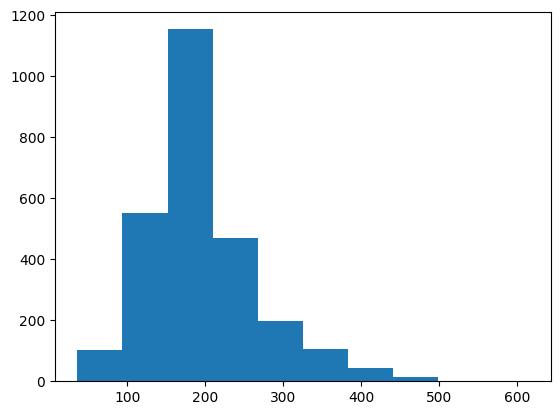

In [25]:
plt.hist(unique_genes)
plt.show()

There are many ways to customize this plot, which are give them as arguments to the plotting function. This is true for all `matplotlib` functions. You can find all the options by looking at the documentation of each function, in our case [here](https://https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).
For example, to plot our data in 20 bins, change the color to green and change the relative width of the bars to 80%, we would use:

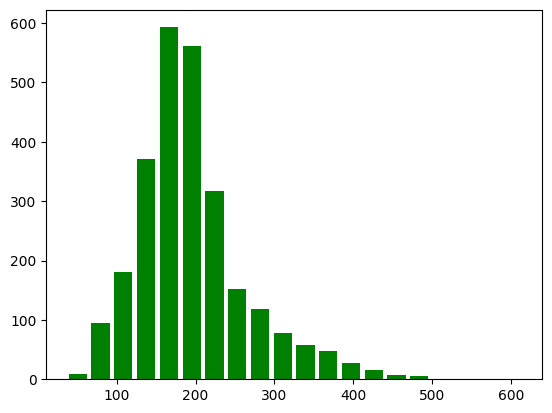

In [26]:
plt.hist(unique_genes, bins=20, color='Green', rwidth=0.8)
plt.show()

And finally, to add a title and axis labels:

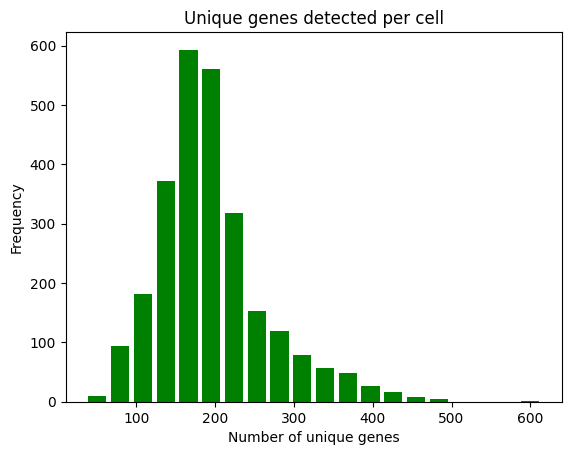

In [27]:
plt.hist(unique_genes, bins=20, color='Green', rwidth=0.8)
plt.title('Unique genes detected per cell')
plt.xlabel('Number of unique genes')
plt.ylabel('Frequency')
plt.show()

Instead of displaying a plot in your notebook, you can also save it to a file using the `.savefig()` method. The file type is determined by the extension you specify in the file name.

As we are working in Colab, we also need to download the file to our computer using `files.download`.

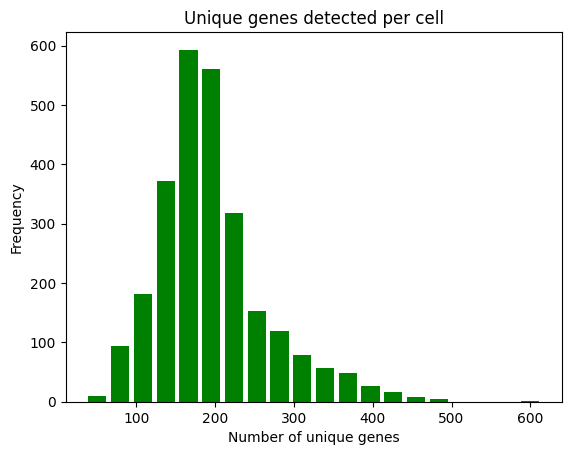

In [28]:
plt.hist(unique_genes, bins=20, color='Green', rwidth=0.8)
plt.title('Unique genes detected per cell')
plt.xlabel('Number of unique genes')
plt.ylabel('Frequency')
plt.savefig('Histogram_unique_genes.png')

In [ ]:
# from google.colab import files
# files.download('Histogram_unique_genes.png')

There are lots of different types of plots in `matplotlib`, some of which you can view in a gallery [here](https://matplotlib.org/stable/gallery/index.html) (this will also give you the code used to generate the plots).

For example, we might want to create a scatter plot of the number of unique genes detected vs. the total gene count per cell:


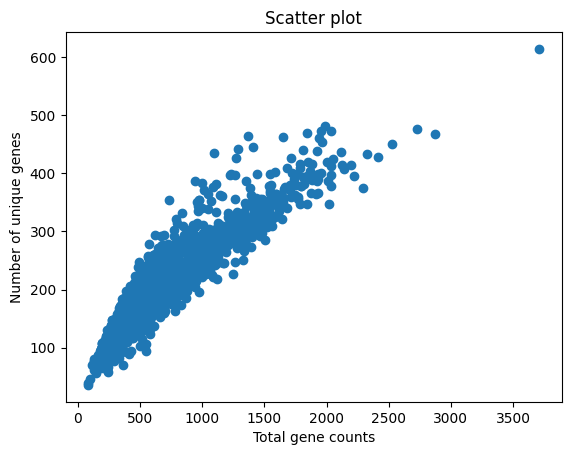

In [29]:
plt.scatter(x=total_gene_counts, y=unique_genes)
plt.title('Scatter plot')
plt.xlabel('Total gene counts')
plt.ylabel('Number of unique genes')
plt.show()

---
#### **_Your turn_: Exercises**

__Exercise 1__: Plot a histogram to visualise the number of unique cells that a gene is dected in across our data set.

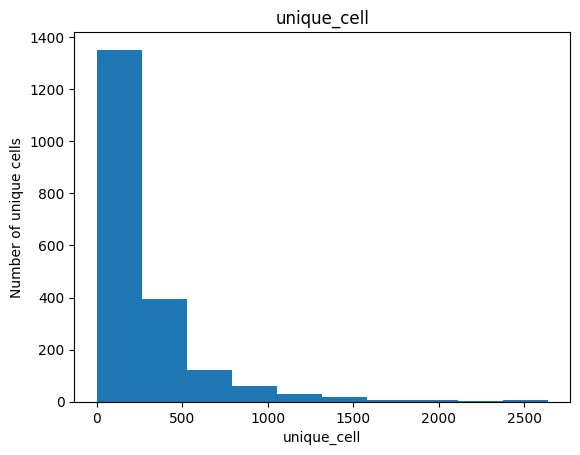

In [30]:
plt.hist(unique_cells)
plt.title('unique_cell')
plt.xlabel('unique_cell')
plt.ylabel('Number of unique cells')
plt.show()

**Exercise 2**: Change the bar colour, axes labels and any other parameters you'd like to try out!

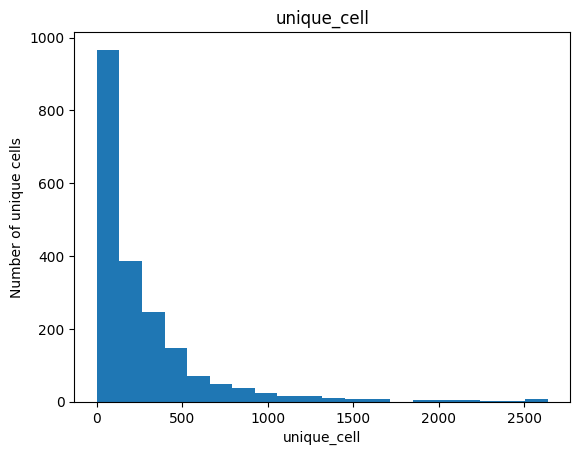

In [31]:
plt.hist(unique_cells, bins = 20)
plt.title('unique_cell')
plt.xlabel('unique_cell')
plt.ylabel('Number of unique cells')
plt.show()

---
## **7. Dimensional reduction and clustering**

For all further steps, we will use the `scanpy` package designed for single-cell RNA sequencing data analysis. It uses a specific format called 'annoted data object' for storing sequencing data and associated metadata. The PBMC dataset has been prepared for you in this format, and we can download it and load it as follows:

In [32]:
!wget -O pbmc.h5ad https://www.dropbox.com/s/fstt2blgac1nhsi/pbmc.h5ad?dl=0

zsh:1: no matches found: https://www.dropbox.com/s/fstt2blgac1nhsi/pbmc.h5ad?dl=0


In [34]:
adata = sc.read('pbmc.h5ad')

The `scanpy` package contains a lot of inbuilt functions that simplify complex processing steps. For example, to generate the same scatter plot we created above, we can use:

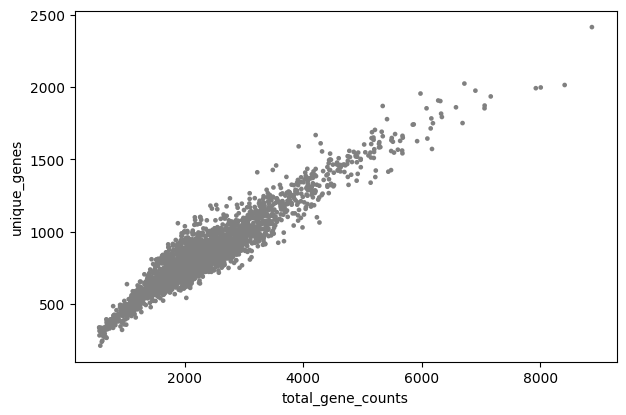

In [35]:
sc.pl.scatter(adata, x='total_gene_counts', y='unique_genes')

Now we want to run dimensionality reduction and clustering on our data so that we can identify different cell types. First, we need to normalise and scale our data to zero mean and unit variance. We also clip values exceeding 10 standard deviations from the mean.

In [36]:
sc.pp.scale(adata, max_value=10)

To run principal component analysis (PCA) on our data:

In [37]:
sc.tl.pca(adata, svd_solver='arpack')

To plot different principal components:

/Users/ricoandreschmitt/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


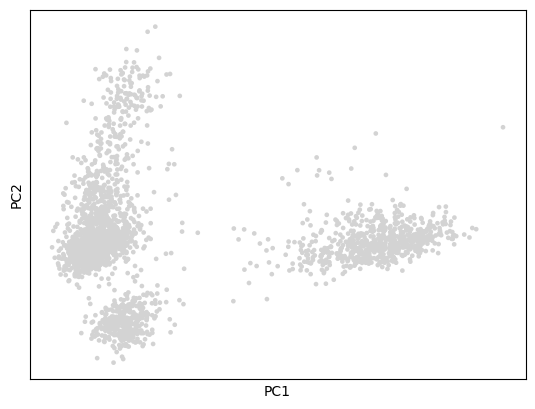

In [38]:
sc.pl.pca(adata, components=['1,2'])

To compute a neighbourhood graph (based on the first 30 principal components and with a neighbourhood size of 10) and the UMAP dimensional reduction, which will help us to better distinguish our cell clusters in 2D:

In [39]:
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=10)
sc.tl.umap(adata)

/Users/ricoandreschmitt/anaconda3/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ricoandreschmitt/anaconda3/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ricoandreschmitt/anaconda3/lib/python3.11/site-packages/umap/dist

Now we can plot gene expression across all cells using the UMAP representation:

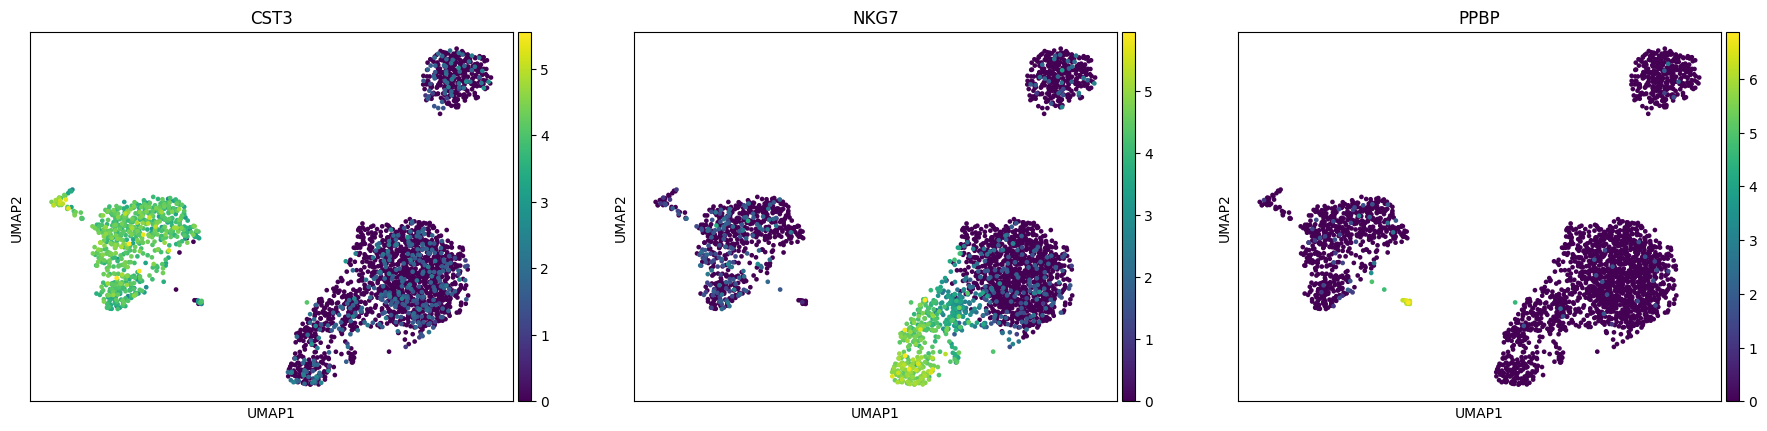

In [40]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

To perform clustering:


In [41]:
sc.tl.leiden(adata, resolution=0.6)

We can now plot the results of the clustering:

/Users/ricoandreschmitt/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/ricoandreschmitt/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


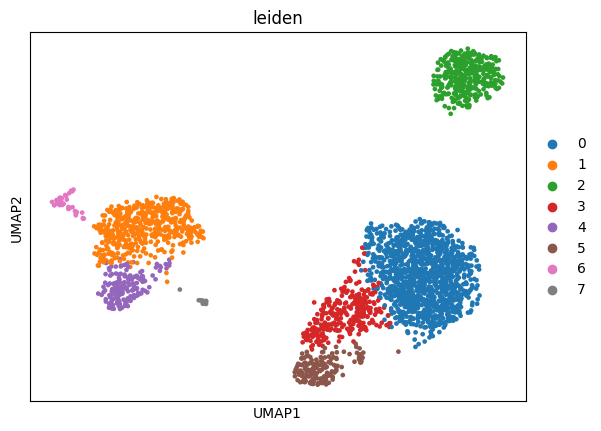

In [42]:
sc.pl.umap(adata, color=['leiden'])

---
## **8. Identifying cell types**

To identify the different cell types, we can visualise the expression of individual genes on the UMAP representation ...

/Users/ricoandreschmitt/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/ricoandreschmitt/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


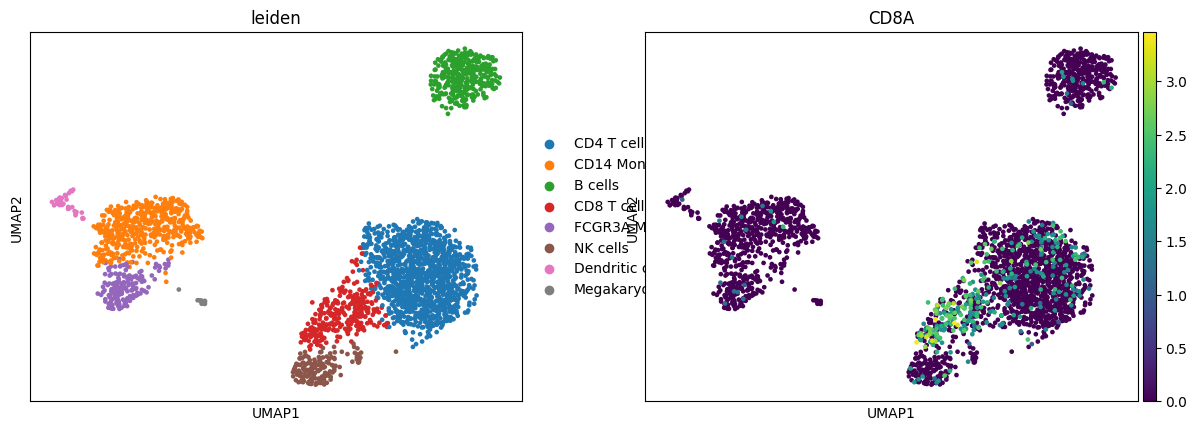

In [53]:
sc.pl.umap(adata, color=['leiden', 'CD8A'])


 ... or as violin plots across all clusters:

/Users/ricoandreschmitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ricoandreschmitt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/ricoandreschmitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ricoandreschmitt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py

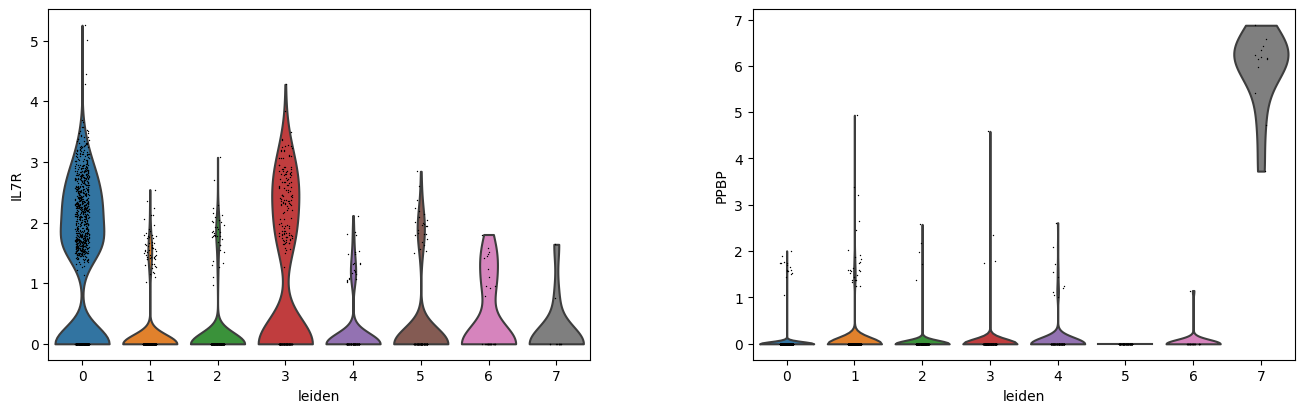

In [46]:
sc.pl.violin(adata, ['IL7R', 'PPBP'], groupby='leiden')

#### **_Your turn_: Exercises**

__Exercise 1__: Shown below is a list of marker genes for different cell types. Can you identify which Cluster (0-7) corresponds to which cell type based on marker gene expression? Please fill in the table with your results by replacing the `?`.

Cell type | Marker genes |  Cluster (0-7)
--- | --- |  ---
B cells | MS4A1 |  2
CD4 T cells | IL7R |  0
CD8 T cells | CD8A |  3
NK cells | GNLY, NKG7 |  5
Dendritic cells | FCER1A, CST3 |  6
CD14 Monocytes | CD14, LYZ |  1
FCGR3A Monocytes | FCGR3A, MS4A7 |  4
Megakaryocytes | PPBP |  7

**Exercise 2**: Create an array called `new_cluster_names` that contains the names of the different cell types in the order of the clusters (0-7). Then run the code below to plot your results!

In [54]:
# Complete this:
new_cluster_names = ['CD4 T cells', 'CD14 Monocytes', 'B cells', 'CD8 T cells', 'FCGR3A Monocytes', 'NK cells', 'Dendritic cells', 'Megakaryocytes']

/Users/ricoandreschmitt/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/ricoandreschmitt/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


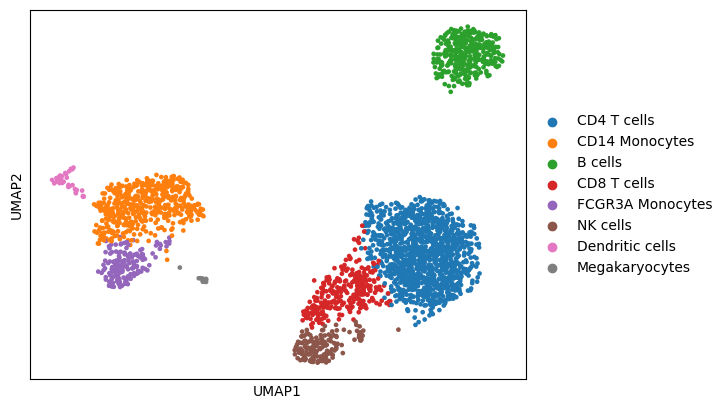

In [55]:
# Then run this:
adata.rename_categories('leiden', new_cluster_names)
sc.pl.umap(adata, color='leiden', title='')

#**Well done!**



